# 머신러닝 입문 과제 
## 소프트웨어공학과 2022101ㅁㅁㅁ 권수현
## 스마트드론공학과 2021129053 이원표

### male_weights와 female_weights를 생성하여 체중데이터를 만들고
### 성별을 목표 변수, 체중을 예측변수로 사용하여
### MLE, MAP, LDA 모델을 생성하고 시험한다

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# 1️⃣ 데이터 생성 
np.random.seed(42)
male_weights = np.random.normal(loc=75, scale=10, size=100) + np.random.normal(0, 2, 100) 
female_weights = np.random.normal(loc=60, scale=8, size=100) + np.random.normal(0, 2, 100) 


In [4]:
# 2️⃣ 편중된 경향 선호 색상 추가
male_colors = np.random.choice([1, 0], size=100, p=[0.3, 0.7])  
female_colors = np.random.choice([1, 0], size=100, p=[0.7, 0.3]) 

In [5]:
# 3️⃣ 독립변수인 키 데이터 추가 
male_heights = np.random.normal(loc=175, scale=6, size=100)
female_heights = np.random.normal(loc=162, scale=5, size=100)


## (데이터셋 설정)

#### 남녀 체중을 각각 100개씩 생성

#### np.random.normal을 사용하여 정규분포를 설정

#### np.random.normal(0, 2, 100)을 사용하여 잡음을 추가

#### 선호 색상을 추가하되, 편중된 경향 30% 70%로 설정

#### 아래의 구현할 키와 체중을 비교하는 모델을 생성하기 위한 독립변수인 키 데이터 추가

In [7]:
# 4️⃣ 데이터프레임 생성
df = pd.DataFrame({
    "Weight": np.concatenate([male_weights, female_weights]),
    "Color": np.concatenate([male_colors, female_colors]),  
    "Height": np.concatenate([male_heights, female_heights]),  
    "Gender": ["Male"] * 100 + ["Female"] * 100
})


In [8]:
# 데이터프레임의 head 10행 출력
print(" 데이터프레임의 head 10행:")
print(df.head(10))

# 데이터프레임의 tail 10행 출력
print("\n 데이터프레임의 tail 10행:")
print(df.tail(10))

 데이터프레임의 head 10행:
      Weight  Color      Height Gender
0  77.136400      0  177.025616   Male
1  72.776066      1  172.528738   Male
2  80.791456      1  172.074363   Male
3  88.625744      0  172.404651   Male
4  72.335895      0  177.366713   Male
5  73.466732      0  172.474093   Male
6  94.564500      0  176.738649   Male
7  83.023503      0  187.452405   Male
8  70.820357      0  180.226748   Male
9  80.276709      0  173.043859   Male

 데이터프레임의 tail 10행:
        Weight  Color      Height  Gender
190  56.538193      0  164.588295  Female
191  57.039831      0  158.371281  Female
192  52.644616      1  162.933834  Female
193  70.459734      0  158.223085  Female
194  65.215004      0  158.942411  Female
195  53.518372      1  154.966695  Female
196  63.770530      1  157.383834  Female
197  65.166141      0  155.241577  Female
198  66.273817      1  157.120634  Female
199  67.512663      0  167.268209  Female


#### 데이터 프레임의 생성

#### Color 값 0 == Blue 선호, Color 값 1 == Red 선호

#### 선호색상 및 키와 몸무게 성별을 통한 데이터프레임

In [10]:
# 5️⃣ MLE 및 MAP 관련 통계
mle_male_mean = np.mean(male_weights)
mle_male_std = np.std(male_weights)
mle_female_mean = np.mean(female_weights)
mle_female_std = np.std(female_weights)

#### 남녀 체중 분포를 활용하여 정규분포를 모델링

In [12]:
# 사전 확률 설정
prior_male = 0.7
prior_female = 0.3

### 데이터의 실제 분포를 반영한 사전확률 계산

In [14]:
# MLE 예측 함수
def mle_estimate(weight):
    return "Male" if abs(weight - mle_male_mean) < abs(weight - mle_female_mean) else "Female"

# MAP 예측 함수
def map_estimate(weight):
    male_likelihood = (1 / (mle_male_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((weight - mle_male_mean) / mle_male_std) ** 2)
    female_likelihood = (1 / (mle_female_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((weight - mle_female_mean) / mle_female_std) ** 2)
    male_posterior = male_likelihood * prior_male
    female_posterior = female_likelihood * prior_female
    return "Male" if male_posterior > female_posterior else "Female"

In [15]:
# 6️⃣ 결정 경계 찾기 (MLE & MAP)
decision_boundary = (mle_male_mean + mle_female_mean) / 2

#### MLE의 결정경계는 위와 같이, MAP의 결정경계는 사전확률을 고려하여 MAP 예측 함수에 구현

In [17]:
# 7️⃣ 학습 및 시험 데이터셋 구분
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

In [18]:
# MLE 예측 적용
train_predictions_mle = train_data["Weight"].apply(mle_estimate)
train_accuracy_mle = accuracy_score(train_data["Gender"], train_predictions_mle)

test_predictions_mle = test_data["Weight"].apply(mle_estimate)
test_accuracy_mle = accuracy_score(test_data["Gender"], test_predictions_mle)

#### 단순히 체중이 남성 평균에 가까우면 “Male”, 여성 평균에 가까우면 “Female” 으로 판단.

#### 최대우도(ML, Maximum Likelihood)에 기반한 결정 경계 적용.

In [20]:
# MAP 예측 적용
train_predictions_map = train_data["Weight"].apply(map_estimate)
train_accuracy_map = accuracy_score(train_data["Gender"], train_predictions_map)

test_predictions_map = test_data["Weight"].apply(map_estimate)
test_accuracy_map = accuracy_score(test_data["Gender"], test_predictions_map)

#### MLE보다 한 단계 발전된 방식으로, 사전 확률(Prior)과 우도(Likelihood)를 고려하여 예측.

#### 각 클래스(남성/여성)의 분포를 고려한 최적의 경계를 사용.

In [22]:
# 정확도 출력
print(f" MLE 모델 학습 데이터 정확도: {train_accuracy_mle * 100:.2f}%")
print(f" MLE 모델 시험 데이터 정확도: {test_accuracy_mle * 100:.2f}%")
print(f" MAP 모델 학습 데이터 정확도: {train_accuracy_map * 100:.2f}%")
print(f" MAP 모델 시험 데이터 정확도: {test_accuracy_map * 100:.2f}%")

 MLE 모델 학습 데이터 정확도: 80.00%
 MLE 모델 시험 데이터 정확도: 76.00%
 MAP 모델 학습 데이터 정확도: 70.00%
 MAP 모델 시험 데이터 정확도: 74.00%


In [23]:
# 8️⃣ 시각화 - MLE와 MAP의 분포 비교
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

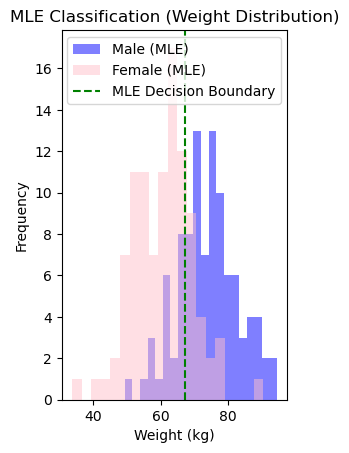

In [24]:
# MLE 분포
plt.subplot(1, 2, 1)
plt.hist(male_weights, bins=20, alpha=0.5, label='Male (MLE)', color='blue')
plt.hist(female_weights, bins=20, alpha=0.5, label='Female (MLE)', color='pink')
plt.axvline(x=decision_boundary, color='green', linestyle='--', label='MLE Decision Boundary')
plt.title('MLE Classification (Weight Distribution)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.legend()

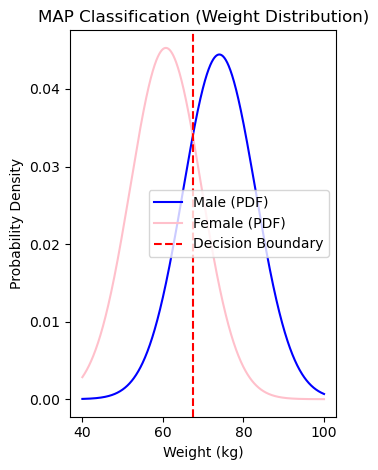

In [25]:
# MAP 분포
plt.subplot(1, 2, 2)
weights = np.linspace(40, 100, 1000)
male_pdf = (1 / (mle_male_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((weights - mle_male_mean) / mle_male_std) ** 2)
female_pdf = (1 / (mle_female_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((weights - mle_female_mean) / mle_female_std) ** 2)

plt.plot(weights, male_pdf, label='Male (PDF)', color='blue')
plt.plot(weights, female_pdf, label='Female (PDF)', color='pink')
plt.axvline(x=decision_boundary, color='red', linestyle='--', label='Decision Boundary')
plt.title('MAP Classification (Weight Distribution)')
plt.xlabel('Weight (kg)')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
# Linear Discriminant Analysis (LDA)
features = df[['Weight', 'Height']].values
labels = df['Gender'].values

# 학습 및 시험 데이터셋 구분
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.25, random_state=42)

# LDA 모델 학습
lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_labels)

# 예측 및 정확도 계산
y_pred = lda.predict(test_data)
test_accuracy_lda = accuracy_score(test_labels, y_pred)
print(f' LDA 모델 정확도: {test_accuracy_lda * 100:.2f}%')


 LDA 모델 정확도: 94.00%


#### 두 변수, (선호 색상대신) 독립인 두변수 키와 체중이 포함된 데이터에 대하여 LDA 실행

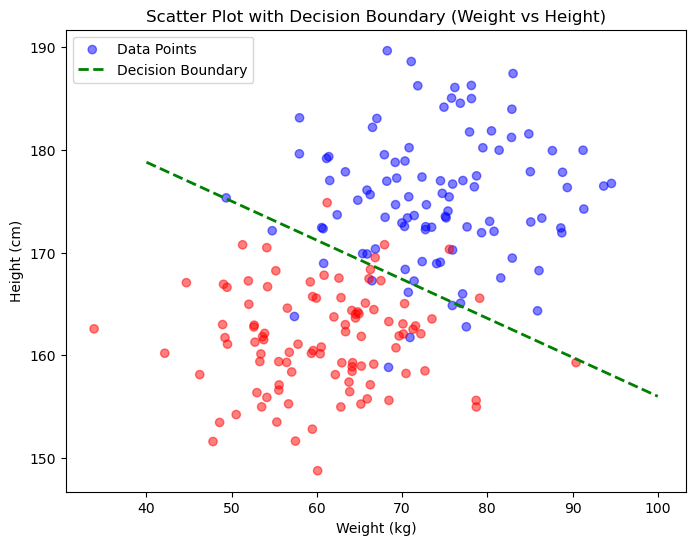

In [28]:
# 🔟 시각화 - Scatter plot과 결정경계
plt.figure(figsize=(8, 6))
colors = ['blue' if g == 'Male' else 'red' for g in df['Gender']]
plt.scatter(df['Weight'], df['Height'], c=colors, alpha=0.5, label='Data Points')

# 결정 경계 생성
x_values = np.linspace(40, 100, 1000)
boundary = -(lda.coef_[0][0] / lda.coef_[0][1]) * x_values - (lda.intercept_ / lda.coef_[0][1])  # Color 제외로 인덱스 조정
plt.plot(x_values, boundary, color='green', linestyle='--', linewidth=2, label='Decision Boundary')

plt.title('Scatter Plot with Decision Boundary (Weight vs Height)')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend()
plt.show()

In [29]:
# 모델 정확도 비교
print(f" 최종 모델 정확도 비교:")
print(f"  - MAP 모델: {test_accuracy_map * 100:.2f}%")
print(f"  - MLE 모델: {test_accuracy_mle * 100:.2f}%")
print(f"  - LDA 모델: {test_accuracy_lda * 100:.2f}%")

 최종 모델 정확도 비교:
  - MAP 모델: 74.00%
  - MLE 모델: 76.00%
  - LDA 모델: 94.00%
